In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
df=pd.read_csv('listings_Istanbul.csv')
df.shape

(45524, 18)

In [2]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               45524
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       19362
reviews_per_month                 19362
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           45524
dtype: int64

In [3]:
#neighbourhood_group and license are columns all values are null so i will drop thes columns
df.drop(['neighbourhood_group','license'],axis=1,inplace=True)
# drop rows with null values
df.dropna(inplace=True)
df.shape

(26162, 16)

In [4]:
df.isna().sum()# no row with null value

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26162 entries, 1 to 45434
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26162 non-null  int64  
 1   name                            26162 non-null  object 
 2   host_id                         26162 non-null  int64  
 3   host_name                       26162 non-null  object 
 4   neighbourhood                   26162 non-null  object 
 5   latitude                        26162 non-null  float64
 6   longitude                       26162 non-null  float64
 7   room_type                       26162 non-null  object 
 8   price                           26162 non-null  int64  
 9   minimum_nights                  26162 non-null  int64  
 10  number_of_reviews               26162 non-null  int64  
 11  last_review                     26162 non-null  object 
 12  reviews_per_month               

In [6]:
#descripe the numerical features
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.616200e+04,2.616200e+04,26162.000000,26162.000000,2.616200e+04,26162.000000,26162.000000,26162.000000,26162.000000,26162.000000,26162.000000
mean,4.420220e+17,2.675693e+08,41.027576,28.984787,2.301572e+03,8.897561,17.812858,1.114432,14.271654,254.040975,8.320771
std,3.722583e+17,1.767908e+08,0.047604,0.130367,1.287724e+04,62.903074,34.742434,1.213520,45.314124,127.681362,11.826683
min,2.727100e+04,1.969200e+04,40.816490,28.050160,5.700000e+01,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,4.627562e+07,7.771009e+07,41.004030,28.973084,9.000000e+02,1.000000,2.000000,0.250000,1.000000,149.000000,1.000000
50%,6.302183e+17,2.846567e+08,41.031454,28.983850,1.419000e+03,2.000000,6.000000,0.730000,3.000000,328.000000,4.000000
75%,7.679034e+17,4.395260e+08,41.048546,29.024470,2.308000e+03,3.000000,18.000000,1.570000,10.000000,362.000000,11.000000
max,9.232745e+17,5.217803e+08,41.479881,29.906130,1.042250e+06,999.000000,1099.000000,17.370000,389.000000,365.000000,281.000000


In [7]:
#descripe the categorical features
df.describe(include=['object'])

,name,host_name,neighbourhood,room_type,last_review
count,26162,26162,26162,26162,26162
unique,14098,4779,39,4,1584
top,Rental unit in Beyoğlu · 1 bedroom · 1 bed · 1...,Mert,Beyoglu,Entire home/apt,2023-06-11
freq,232,434,7118,19414,895


<ipython-input-8-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

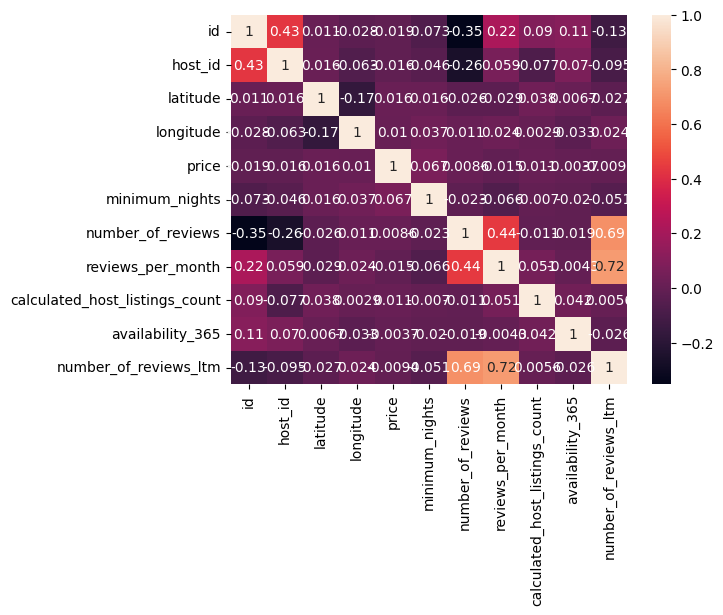

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
print('the average of the price is ',df['price'].mean())
print('the minimum price is ',df['price'].min())
print('the maximum price is ',df['price'].max())

the average of the price is  2301.571821726168
the minimum price is  57
the maximum price is  1042250


In [13]:
#analysis the factors affect on the price
#room_type
df.groupby(['room_type'])['price'].agg([np.min,np.max,np.mean])
#Entire home/apt : have the max price

,amin,amax,mean
room_type,,,
Entire home/apt,111,1042250,2523.369939
Hotel room,180,72999,2401.458498
Private room,57,555500,1648.295304
Shared room,115,60000,1056.154362


<Axes: xlabel='price', ylabel='count'>

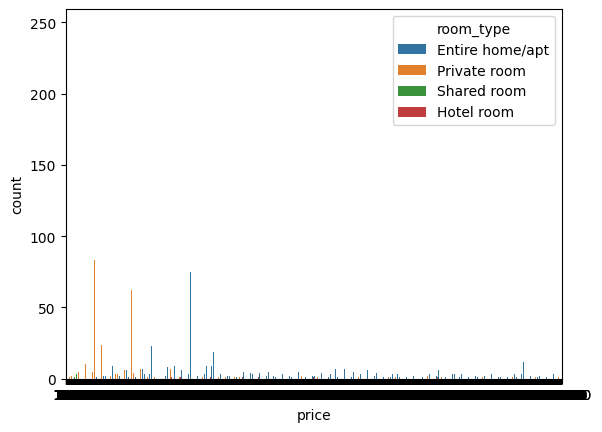

In [14]:
sns.countplot(x='price',hue='room_type',data=df)
#the max price of homes with Entire home/apt and Private room

In [15]:
import plotly.express as px
fig=px.pie(df,values='price',names='room_type')
fig.show()


In [18]:
#neighbourhood
df.groupby(['neighbourhood'])['price'].agg([np.min,np.max,np.mean]).sort_values(by='amax',ascending=False)
#Beyoglu neighbourhood in it the maximum prices

,amin,amax,mean
neighbourhood,,,
Beyoglu,200,1042250,2771.857123
Kadikoy,111,1000000,1745.676025
Fatih,216,943275,2589.599039
Cekmekoy,250,555500,15922.421053
Besiktas,130,285330,2286.210293
Pendik,286,284935,2528.539062
Bahcelievler,60,182576,2005.064407
Sisli,95,143074,2355.609736
Esenyurt,60,105736,1573.294854


In [19]:
fig=px.pie(df,values='price',names='neighbourhood')
fig.show()
#Beyoglu is the neighbourhood with most prices

In [24]:
#minimum_nights
#pd.crosstab(df['minimum_nights'],df['availability_365'])
df.groupby(['minimum_nights'])['price'].agg([np.min,np.max,np.mean]).sort_values(by='amax',ascending=False)
#minmum nights should to stay with max price is 300

,amin,amax,mean
minimum_nights,,,
300,184,1042250,70310.400000
10,240,1000000,5112.764706
2,115,943275,2326.572729
1,60,555500,2054.447299
3,150,301486,2398.863889
...,...,...,...
55,461,570,515.500000
11,521,521,521.000000
85,500,500,500.000000


In [26]:
df.groupby(['availability_365'])['price'].agg([np.min,np.max,np.mean]).sort_values(by='amax',ascending=False)
#151 days availabe in 365 is the max price

,amin,amax,mean
availability_365,,,
151,300,1042250,31837.485714
365,115,1000000,2600.059157
117,350,943275,34071.137931
0,57,555500,2726.759247
90,166,288570,2502.164474
...,...,...,...
14,328,2319,1243.538462
13,184,2279,967.882353
194,1094,2181,1617.833333
